# Import Libraries

In [1]:
import cv2
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

# Import raw file & convert to grayscale
Reduce information for each pixel

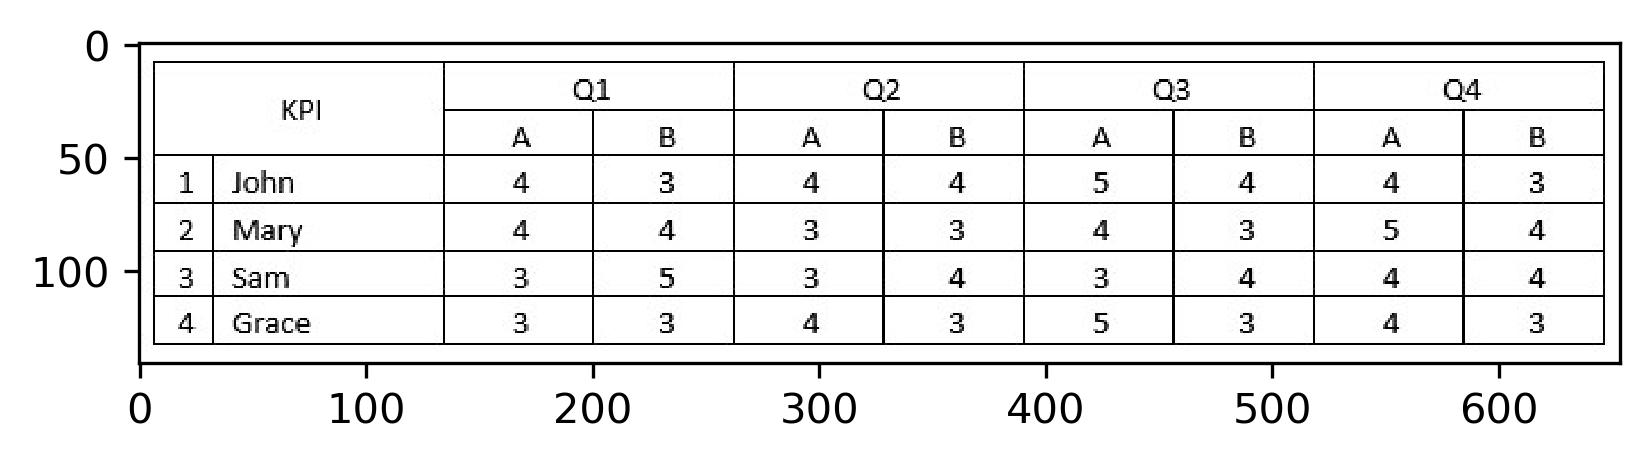

In [2]:
src = "Table.JPG"
img = cv2.imread(src, cv2.IMREAD_GRAYSCALE)

height, width = img.shape
dpi_rand = 300
plt.figure(figsize=(width*3/dpi_rand, height*3/dpi_rand), dpi=dpi_rand)
plt.imshow(img,cmap='Greys_r')
plt.show()

# Convert Grayscale to Binary
Convert grayscale to binary based on thresholding algorithm

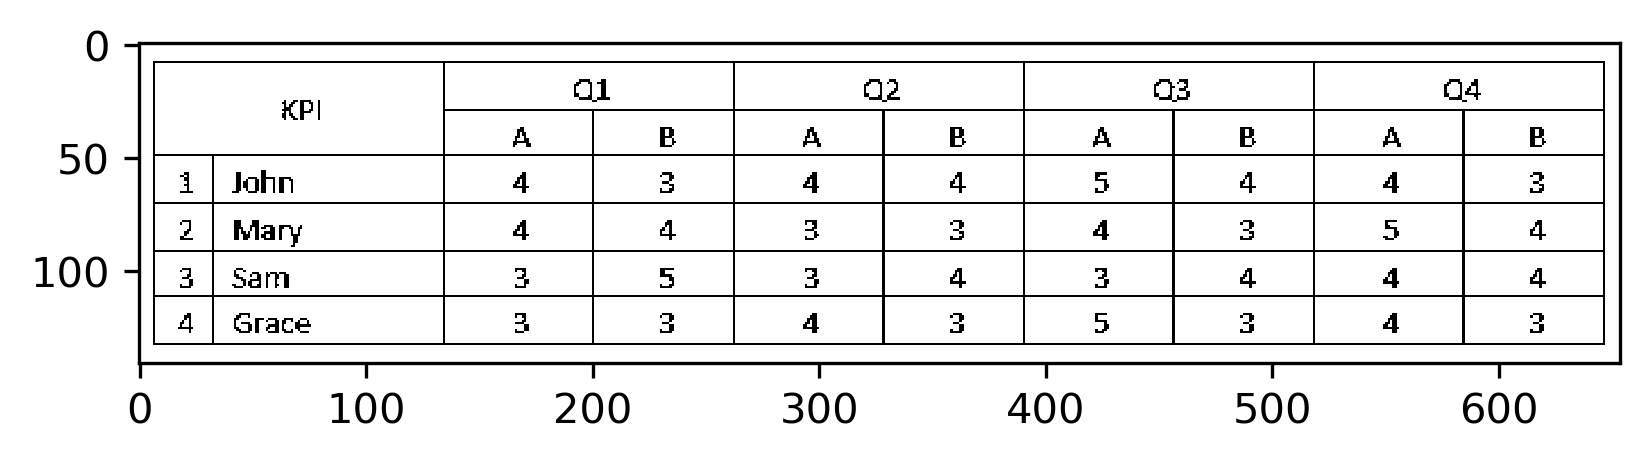

In [3]:
_, bw = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

height, width = bw.shape
dpi_rand = 300
plt.figure(figsize=(width*3/dpi_rand, height*3/dpi_rand), dpi=dpi_rand)
plt.imshow(bw,cmap='Greys_r')
plt.show()

# Find Contour Using Binary Image
2 Contour Feature Extraction are used:
1. Contour Approximation whereby vertices = 4
2. Contour Perimeter whereby perimeter more than 80 but less than 1000

In [4]:
_, contours, _ = cv2.findContours(bw, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
boxes = list()
for contour in contours:
    epsilon = 0.001 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)
    if len(approx) == 4 and 80< cv2.arcLength(contour, True) <1000:  
        boxes.append(approx)
        
print("Number of detected boxes: {}".format(len(boxes)))  

Number of detected boxes: 53


# Plot Detected Boxes

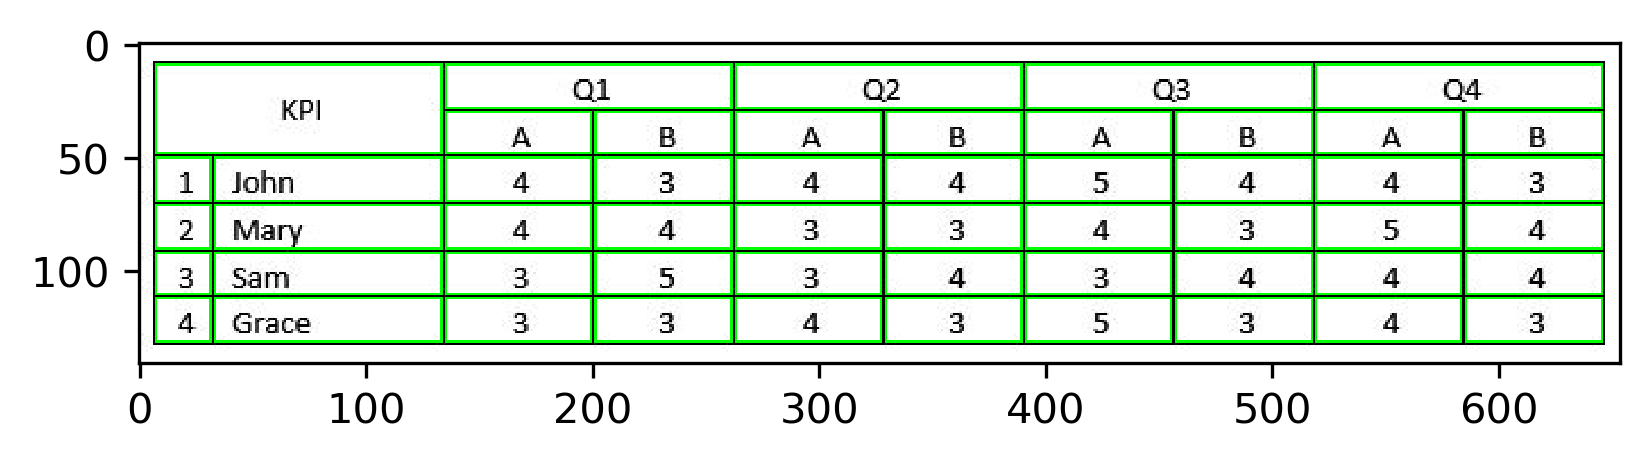

In [5]:
img = cv2.imread(src, cv2.IMREAD_ANYCOLOR)
for box in boxes:
    cv2.drawContours(img, [box], 0, (0,255,0), 1)


height, width, channels = img.shape
dpi_rand = 300
plt.figure(figsize=(width*3/dpi_rand, height*3/dpi_rand), dpi=dpi_rand)
plt.imshow(img)
plt.show()